In [1]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
def dunn_idx(X,labels,centroids,distances):
    
    # Calculate within-cluster scatter (W)
    within_cluster_distances = []
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        cluster_distances = pairwise_distances(cluster_points, [centroids[i]])
        within_cluster_distances.extend(cluster_distances)
    W = np.mean(within_cluster_distances)

    # Calculate between-cluster separation (B)
    between_cluster_distances = []
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            cluster_distance = np.linalg.norm(centroids[i] - centroids[j])
            between_cluster_distances.append(cluster_distance)
    B = min(between_cluster_distances)

    # Calculate Dunn's Index
    dunn_index = W / B
    return dunn_index

In [3]:
#Xi_Beni_idx
def Xi_Beni_idx(X,labels,centroids):
    # Calculate pairwise distances between all points
    distances = pairwise_distances(X)

    # Calculate within-cluster scatter (W)
    within_cluster_distances = []
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        cluster_distances = pairwise_distances(cluster_points, [centroids[i]])
        within_cluster_distances.extend(cluster_distances)
    W = np.mean(within_cluster_distances)

    # Calculate between-cluster separation (B)
    between_cluster_distances = []
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            cluster_distance = np.linalg.norm(centroids[i] - centroids[j])
            between_cluster_distances.append(cluster_distance)
    B = np.mean(between_cluster_distances)
    XB_index = W / B
    # Calculate Xi-Beni (XB) Index
    return XB_index

In [4]:
def renum_label(label,colormap):
    
    for i in range(label.shape[0]):
        if(label[i]==-1):
            label[i] = len(colormap)-1
        else:
            label[i] = label[i]+1
    return label

In [5]:
colormap=np.array(['Red','green','blue','orange','purple','brown','pink','lightblue','maroon','gray','olive','cyan','aqua','fuchsia','navy','gold','lawngreen','indigo','honeydew','tomato','forestgreen','teal','aquamarine','azure','chartreuse','limegreen','coral','crimson','darkblue','royalblue','silver','lime','darkgreen','beige','black'])

In [6]:
data_electric_motor = pd.read_csv('dataset_electric_motor/measures_v2.csv')
np_nm= data_electric_motor.values

print(np_nm)


[[18.80517197 19.08666992]
 [18.81857109 19.09239006]
 [18.82876968 19.08938026]
 ...
 [24.44524667 91.57718806]
 [24.51161281 91.62925259]
 [24.55916623 91.66269213]]


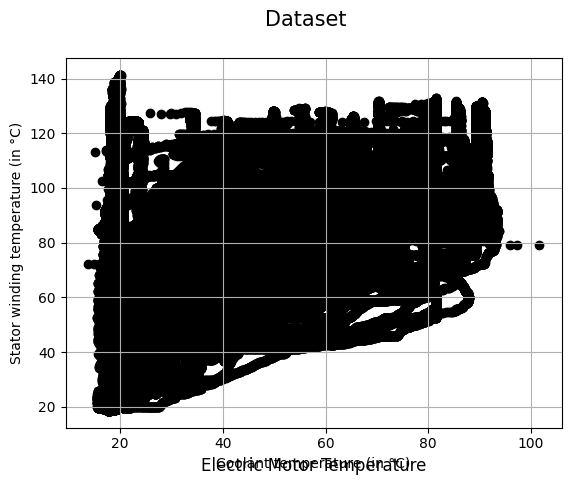

In [7]:
plt.figure(1)
plt.figure(1).suptitle('Dataset', fontsize=15)
plt.rcParams["figure.figsize"] = (10,10) 
plt.scatter(np_nm[:,0],np_nm[:,1],color='black')
plt.title("Electric Motor Temperature", fontsize=12, y=-0.14) 
plt.xlabel('Coolant temperature (in °C)')
plt.ylabel('Stator winding temperature (in °C)')
plt.grid()
# Save the plot
plt.savefig('implementation_dataset.png')
plt.show() 


In [8]:
#KMean
from sklearn.cluster import KMeans

In [9]:
model_kmeans=KMeans(n_clusters=15)
model_kmeans.fit(np_nm)

/home/clan-nur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15)

In [10]:
print("KMean")
#print("Davies Bouldin Index")
#dunn_index = dunn_idx(np_nm,model_kmeans.labels_,model_kmeans.cluster_centers_,pairwise_distances(np_nm))
#print(f"Dunn Index: {dunn_index}")
km_index = davies_bouldin_score(np_nm, model_kmeans.labels_)
print(f"Davies-Bouldin Index: {km_index}")
##xb_index = Xi_Beni_idx(np_nm, model_kmeans.labels_ ,model_kmeans.cluster_centers_)
#print(f"Davies-Bouldin Index of complex9: {xb_index}")
#print("Silhouette Score")
#ss_index = silhouette_score(np_nm, model_kmeans.labels_ )
#print(f"Silhouette Score: {ss_index}")

KMean
Davies-Bouldin Index: 0.7373281601233883


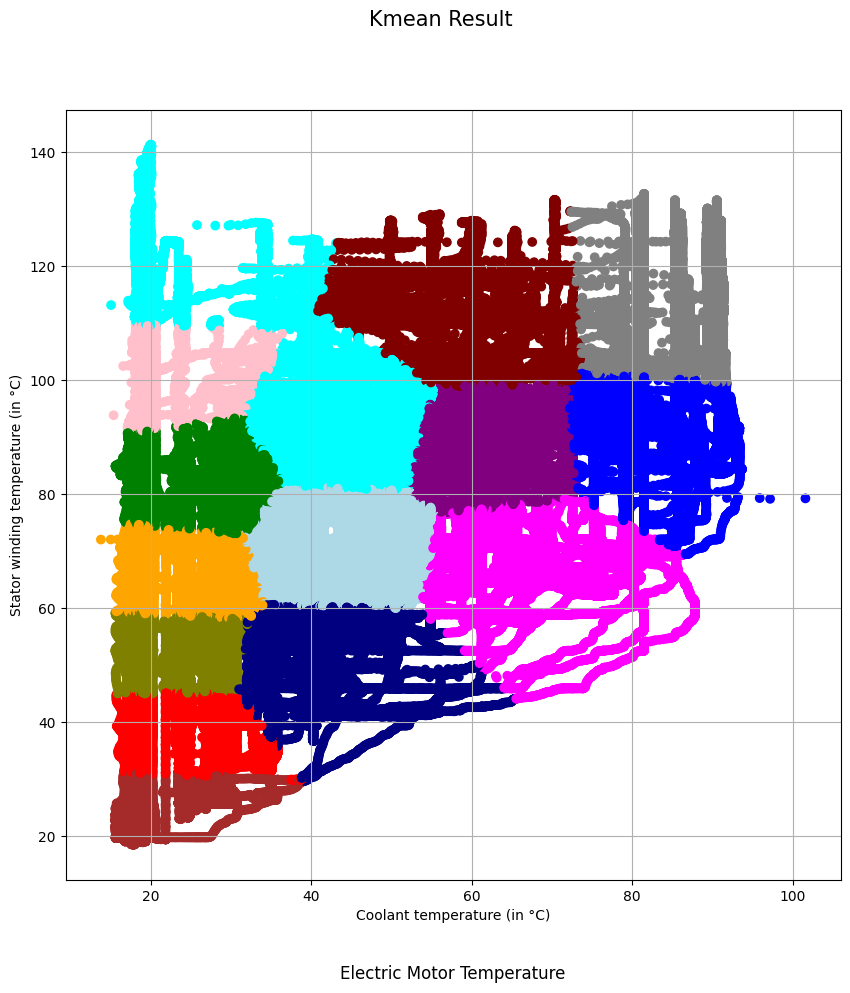

In [11]:
plt.figure(1)
plt.figure(1).suptitle('Kmean Result', fontsize=15)
plt.rcParams["figure.figsize"] = (10,10) 
plt.scatter(np_nm[:,0],np_nm[:,1],c=colormap[model_kmeans.labels_])
plt.title("Electric Motor Temperature", fontsize=12, y=-0.14) 
plt.xlabel('Coolant temperature (in °C)')
plt.ylabel('Stator winding temperature (in °C)')
plt.grid()
# Save the plot
plt.savefig('Kmean Result.png')
plt.show() 

In [12]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [18]:
bandwidth = estimate_bandwidth(np_nm, quantile=0.2, n_samples=500)

In [20]:
model_ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model_ms.fit(np_nm)

MeanShift(bandwidth=22.26323801952541, bin_seeding=True)

In [23]:
print("MeanShift")
print("Davies Bouldin Index")
mn_index = davies_bouldin_score(np_nm, model_ms.labels_)
print(f"Davies-Bouldin Index: {mn_index}")

MeanShift
Davies Bouldin Index
Davies-Bouldin Index: 0.8020816721327567


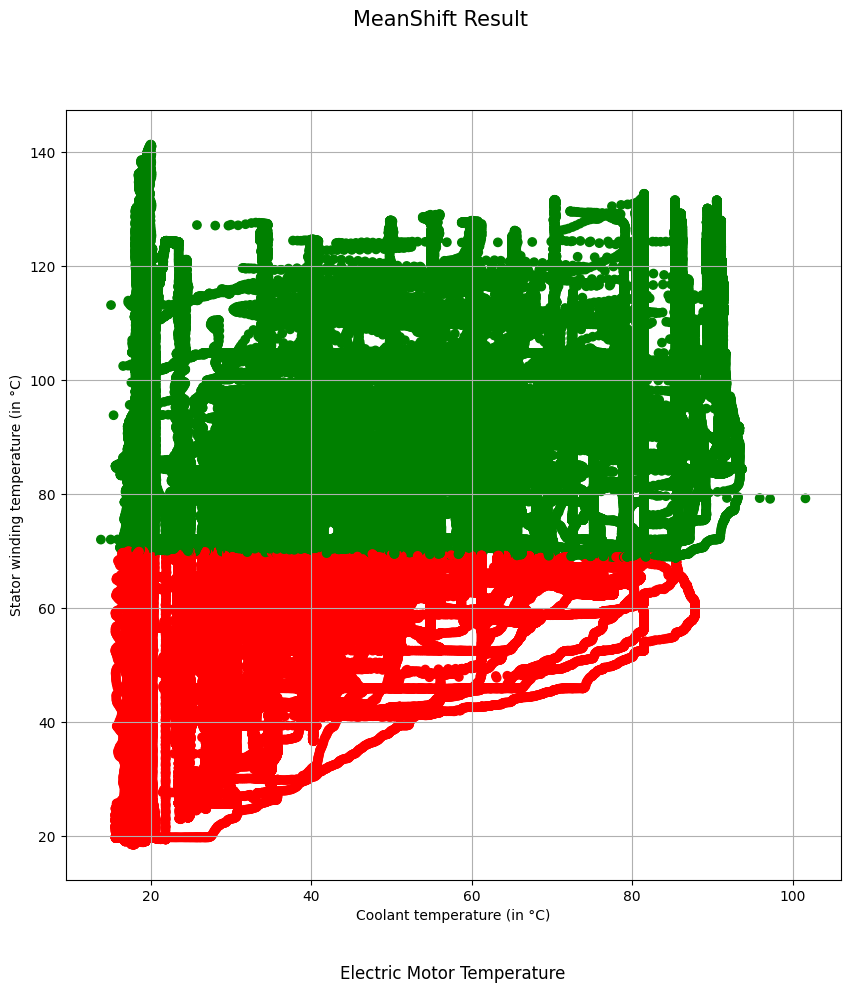

In [25]:
plt.figure(1)
plt.figure(1).suptitle('MeanShift Result', fontsize=15)
plt.rcParams["figure.figsize"] = (10,10) 
plt.scatter(np_nm[:,0],np_nm[:,1],c=colormap[model_ms.labels_])
plt.title("Electric Motor Temperature", fontsize=12, y=-0.14) 
plt.xlabel('Coolant temperature (in °C)')
plt.ylabel('Stator winding temperature (in °C)')
plt.grid()
# Save the plot
plt.savefig('MeanShift Result.png')
plt.show() 